# How can we control the increasing number of accidents in New York?

In [2]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

## Introduction

**Business Context.** The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). 

The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

**Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is `;` instead of the default `,`. You will be performing the following tasks on the data:

1. Extract additional borough data stored in a JSON file
2. Read, transform, and prepare data for visualization
3. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:

1. How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

## Fetching the relevant data

The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the ```data``` folder.

### Question:

Use the function ```json.load()``` to load the file ```borough_data.json``` as a dictionary.

**Answer.** One possible solution is given below:

In [3]:
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

### Question:

Similarly, use the pandas function ```read_csv()``` to load the file ```accidents.csv``` as a DataFrame. Name this DataFrame ```df```. 

**Answer.** One possible solution is given below:

In [4]:
with open('data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')
    
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


## Overview of the data

Let's go through the columns present in the dataframe:

In [5]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

We have the following columns

1. **BOROUGH**: The borough in which the accident occured
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the place of accidents
5. **DATE**: Date of the accident
6. **TIME**: Time of accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Category wise injury
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Category wise death
11. **ON STREET NAME**: Street where the accident occured
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: zip code of the accident location

### Exercise 1 (30 min):

Since 2014, New York City has been implementing a road safety plan named [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). It aims to reduce the number of traffic deaths to *zero* by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:

- [ ] Automated pedestrian detection
- [ ] Road safety audits at high risk locations
- [ ] Expansion in the cycle track network
- [ ] Targeted education and awareness initiatives
- [ ] Creation of pedestrian refuge islands
- [ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)

Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.

**Note:** You can create check marks by double-clicking this cell and adding an ```[x]``` in the corresponding lines. 

**Answer.**

- [ ] Automated pedestrian detection


- [x] Road safety audits at high risk locations


- [x] Expansion in the cycle track network


- [x] Targeted education and awareness initiatives


- [x] Creation of pedestrian refuge islands


- [x] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)


Let's go ahead and answer each of the client's questions.

## Answering the client's questions

### Exercise 2 (45 min):

Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?

**Hint**: You may find the pandas functions ```to_datetime()``` and ```dt.to_period()``` useful.

**Answer.**

In [6]:
# df.reset_index(inplace=True)
df['DATE']=pd.to_datetime(df['DATE'])

In [7]:
monthly = df['DATE']
# print(monthly.head())
monthly = pd.DataFrame(monthly)
# monthly.DATE.dt.to_period('M')
monthly = pd.DataFrame(monthly['DATE'].groupby(monthly.DATE.dt.to_period('M')).agg('count'))
monthly

,DATE
DATE,
2018-01,11735
2018-02,10395
2018-03,12519
2018-04,11679
2018-05,13438
2018-06,13314
2018-07,12787
2018-08,12644
2018-09,12425


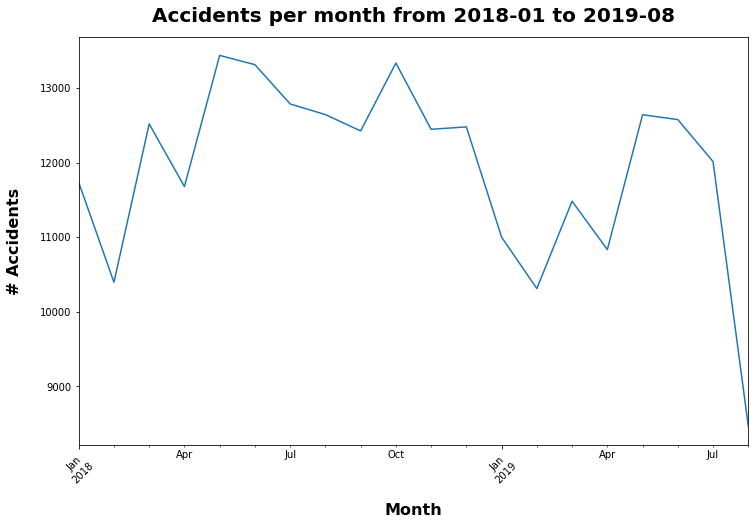

In [8]:
ax = monthly.plot.line(y='DATE', legend=False, figsize = (12, 7.5))
# ax = monthly.plot.bar(y='DATE', legend=False, figsize = (12, 7.5))

ax.set_xlabel("Month", labelpad=18, fontsize=16, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Accidents per month from 2018-01 to 2019-08', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=45)
plt.show()

**Additional comment:** From the plot above, we can see that the maximum amount of accidents ocurred in May-2018. Also, we can see that it decresed since that month until Feb-2019, with the only exception of Oct-2018 which had a very high number of accidents. Also, we can see that compared to the same month in 2018, there have been less accidents every month in 2019.

### Exercise 3 (20 min):

From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?

**Answer.**
From the plot above, it is clear that Aug-2019 is the month with the lowest number of accidents. But, we should check what is the amount of data we have from that month.

In [17]:
# monthly[monthly==monthly.min()]
monthly.index[monthly["DATE"].argmin()]

Period('2019-08', 'M')

In [18]:
df.sort_values(by=['DATE'], inplace=True, ascending=False)
print(df['DATE'].head())
weekly = pd.DataFrame(df['DATE'])
weekly_ = pd.DataFrame(df['DATE'].groupby(weekly.DATE.dt.to_period('W')).agg('count'))
weekly_

3165    2019-08-24
3081    2019-08-24
15404   2019-08-24
5104    2019-08-24
5112    2019-08-24
Name: DATE, dtype: datetime64[ns]


,DATE
DATE,
2018-01-01/2018-01-07,2581
2018-01-08/2018-01-14,2953
2018-01-15/2018-01-21,2583
2018-01-22/2018-01-28,2508
2018-01-29/2018-02-04,2570
...,...
2019-07-22/2019-07-28,2731
2019-07-29/2019-08-04,2695
2019-08-05/2019-08-11,2635


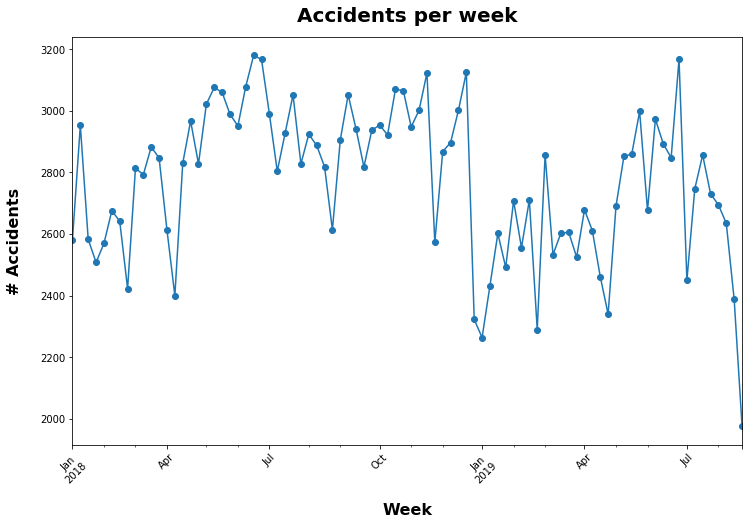

In [290]:
ax = weekly_.plot(y='DATE', legend=False, figsize = (12, 7.5),style='o-', markevery=1)
ax.set_xlabel("Week", labelpad=18, fontsize=16, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Accidents per week', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=45)
# ax.plot(, markevery=1)
plt.show()

**Answer continued.**
From the previous analysis, it is noticeable that we only have data until August 24th. Also, given the weekly plot, it is highly unlikely that the last week of August had 0 accidents. Therefore, we could be simply facing a lack of data. Moreover, the last week is the week with the least amount of accidents, with **1977** . In a best case scenario, that being the last week of August following the trend of previous weeks. The amount of accident might have been around 1500. Giving us a total of roughly **10000** accidents by the end of August, which is similar to other months, like Jan-2019.

### Exercise 4 (40 min):

How does the number of accidents vary throughout a single day? Create a new column `HOUR` based on the data from the `TIME` column, then plot a bar graph of the distribution per hour throughout the day.

**Hint:** You may find the function ```dt.hour``` useful. 

**Answer.**

In [291]:
df.loc[:,'TIME'] = pd.to_datetime(df.TIME, format='%H:%M')

In [292]:
# df['TIME'] = pd.Series([val.time() for val in df['TIME']])
# df['DATE_TIME']=df.apply(lambda r : pd.datetime.combine(r['DATE'],r['TIME']),1)
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3165,2019-08-24,1900-01-01 22:00:00,MANHATTAN,10022.0,40.758980,-73.96244,1 AVENUE,0,0,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4193901,Taxi,Box Truck,NaN,NaN,NaN
3081,2019-08-24,1900-01-01 15:08:00,BROOKLYN,11228.0,40.616695,-74.00761,79 STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4193831,Sedan,Sedan,NaN,NaN,NaN
15404,2019-08-24,1900-01-01 17:06:00,BROOKLYN,11226.0,40.652170,-73.96141,CATON AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,4193923,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
5104,2019-08-24,1900-01-01 10:51:00,QUEENS,11361.0,40.760800,-73.76570,NORTHERN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,4193786,Sedan,Sedan,NaN,NaN,NaN
5112,2019-08-24,1900-01-01 15:20:00,QUEENS,11412.0,40.693170,-73.75688,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,4194228,Sedan,Motorbike,NaN,NaN,NaN


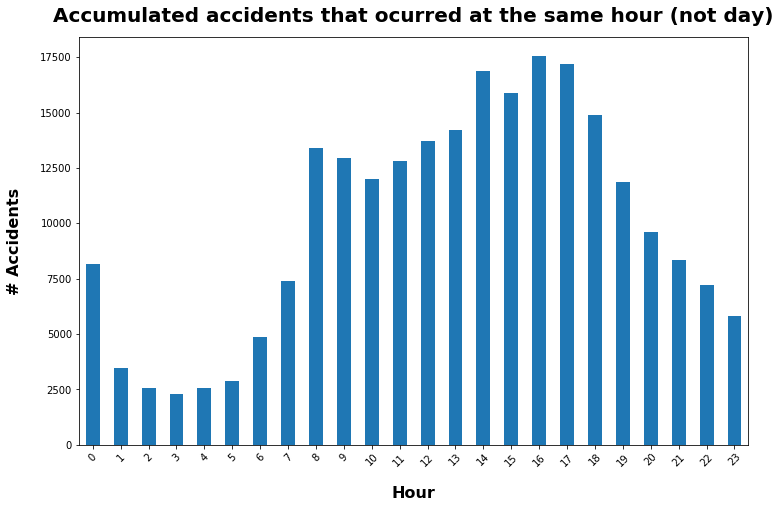

In [293]:
hourly = pd.DataFrame(df['TIME'])
hourly_ = pd.DataFrame(df['TIME'].groupby(hourly.TIME.dt.hour).agg('count'))
hourly_

ax = hourly_.plot.bar(y='TIME', legend=False, figsize = (12, 7.5))
ax.set_xlabel("Hour", labelpad=18, fontsize=16, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Accumulated accidents that ocurred at the same hour (not day)', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=45)
plt.show()

### Exercise 5 (15 min):

In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?

**Answer.**
Here, since we are not considering the date or place, we are in a clear example of the Simpson Paradox. The information accumulated in such a broad way, provides information that leads to over-generalized conclusions. Probably misleading if we group by date or borough.

### Exercise 6:

How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.

**Hint:** You may find the function ```dt.weekday``` useful.

**Answer.**

In [294]:
week_day = pd.DataFrame(df['DATE'])
week_day_ = pd.DataFrame(df['DATE'].groupby(week_day.DATE.dt.weekday).agg('count'))
print(week_day_)

       DATE
DATE       
0     34719
1     35651
2     35188
3     36254
4     37886
5     31784
6     27040


In [295]:
week_day_.reset_index(drop=True, inplace=True)
x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day_['Day'] = x
week_day_.set_index('Day')
print(week_day_)

    DATE        Day
0  34719     Monday
1  35651    Tuesday
2  35188  Wednesday
3  36254   Thursday
4  37886     Friday
5  31784   Saturday
6  27040     Sunday


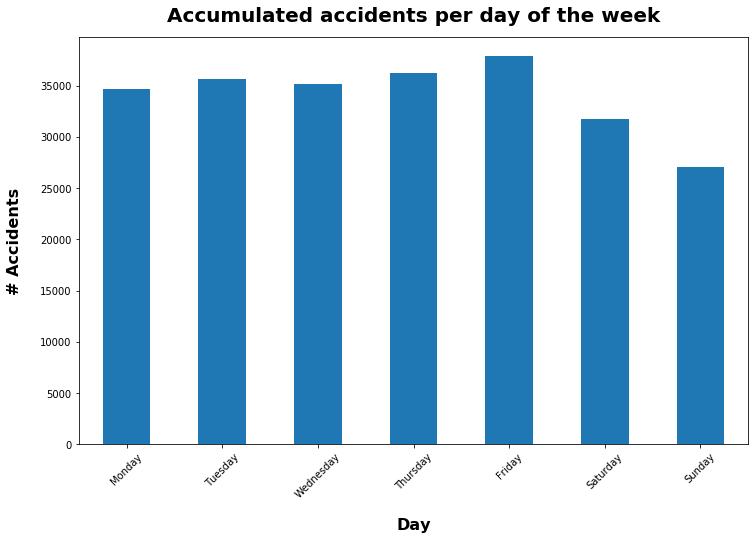

In [296]:
ax = week_day_.plot.bar(x='Day',y='DATE', legend=False, figsize = (12, 7.5))
ax.set_xlabel("Day", labelpad=18, fontsize=16, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Accumulated accidents per day of the week', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=45)
plt.show()

**Answer** We can see that this can be misleading as well. Given that we do not discriminate by place or date.

### Exercise 7 (40 min):

Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?

**Hint:** You may want to update some of the keys in the borough dictionary to match the names in the dataframe. 

In [297]:
print(df['BOROUGH'].unique())
bor=df['BOROUGH'].unique()
borough_data_2=dict()
for key in borough_data.keys():
    print(key)
    for borough in bor:
        if borough.lower() in key:
            borough_data_2[borough]= borough_data[key]

['MANHATTAN' 'BROOKLYN' 'QUEENS' 'BRONX' 'STATEN ISLAND']
the bronx
brooklyn
manhattan
queens
staten island


In [298]:
#This should not print anything
for key in borough_data_2.keys():
    if key not in bor:
        print('Failed test')
        
print(borough_data_2)

{'BRONX': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1}, 'BROOKLYN': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82}, 'MANHATTAN': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83}, 'QUEENS': {'name': 'queens', 'population': 2358582.0, 'area': 108.53}, 'STATEN ISLAND': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}


In [299]:
by_borough = pd.DataFrame(df['BOROUGH'])
by_borough_ = pd.DataFrame(df.groupby('BOROUGH')['BOROUGH'].agg('count'))
print(by_borough_)

bd_df = pd.DataFrame.from_dict(borough_data_2, orient='index')

by_borough_ = pd.concat([by_borough_['BOROUGH'], bd_df], axis=1)
print(by_borough_)
area = pd.DataFrame(by_borough_['BOROUGH']/by_borough_['area'])
print(area)
# area.columns

               BOROUGH
BOROUGH               
BRONX            37709
BROOKLYN         76253
MANHATTAN        48749
QUEENS           67120
STATEN ISLAND     8691
               BOROUGH           name  population    area
BOROUGH                                                  
BRONX            37709      the bronx   1471160.0   42.10
BROOKLYN         76253       brooklyn   2648771.0   70.82
MANHATTAN        48749      manhattan   1664727.0   22.83
QUEENS           67120         queens   2358582.0  108.53
STATEN ISLAND     8691  staten island    479458.0   58.37
                         0
BOROUGH                   
BRONX           895.700713
BROOKLYN       1076.715617
MANHATTAN      2135.304424
QUEENS          618.446512
STATEN ISLAND   148.894980


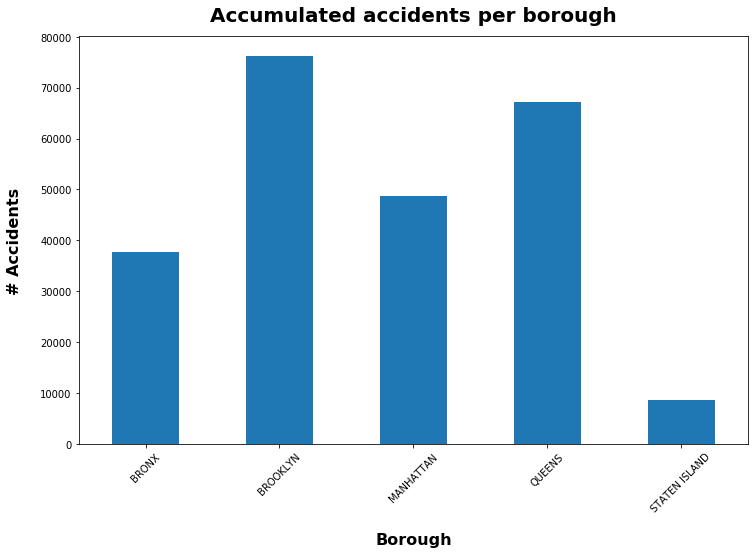

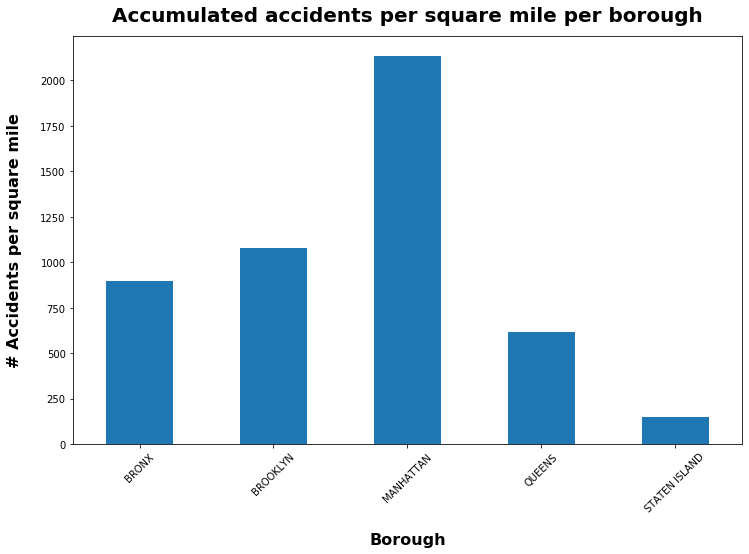

In [300]:
ax = by_borough_.plot.bar(y=['BOROUGH'], legend=False, figsize = (12, 7.5))
ax.set_xlabel("Borough", labelpad=18, fontsize=16, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Accumulated accidents per borough', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=45)

ax1 = area.plot.bar(y=0, legend=False, figsize = (12, 7.5))
ax1.set_xlabel("Borough", labelpad=18, fontsize=16, fontweight='bold')
ax1.set_ylabel("# Accidents per square mile", labelpad=18, fontsize=16, fontweight='bold')
ax1.set_title('Accumulated accidents per square mile per borough', fontsize=20, fontweight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)

plt.show()


**Answer.** From the previous plots, we can see that, despite there are more accidents in Brooklyn and Queens, they are much bigger boroughs that the rest. This is also misleading, because it is natural to have more accidents in a bigger location because there are more streets, crossings and probably connections to other locations. It is only when normalized by the area of each borough that we can notice that Manhattan has the biggest issue, because they have the highest number of accidents per square mile by far. Doubling the number of Brooklyn, which is second.

### Exercise 8 (40 min):

Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.

**Hint:** You can use ```sns.FacetGrid``` to create a grid of plots with the hourly data of each borough. 

In [301]:
time_bor = df[['BOROUGH','TIME']]

time_bor = pd.DataFrame(time_bor.groupby(['BOROUGH',time_bor.TIME.dt.hour]).agg('count'))
time_bor.columns = ['COUNT']
time_bor.reset_index(level=['TIME', 'BOROUGH'],inplace=True)
time_bor

,BOROUGH,TIME,COUNT
0,BRONX,0,1329
1,BRONX,1,529
2,BRONX,2,402
3,BRONX,3,361
4,BRONX,4,418
...,...,...,...
115,STATEN ISLAND,19,415
116,STATEN ISLAND,20,367
117,STATEN ISLAND,21,268
118,STATEN ISLAND,22,224


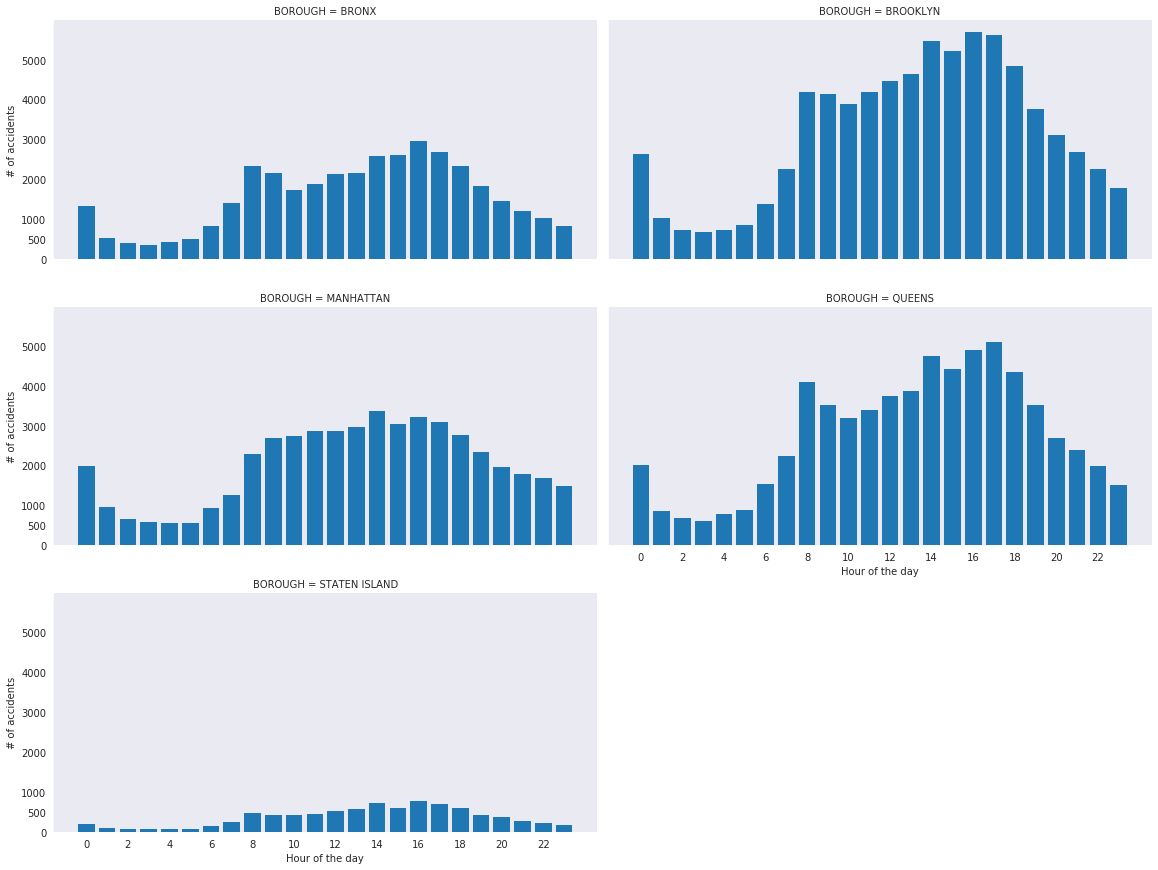

In [302]:
with sns.axes_style("dark"):
    g = sns.FacetGrid(time_bor, col = 'BOROUGH',
                  height=4, aspect=2, col_wrap=2)
g = g.map_dataframe(plt.bar, x="TIME", height="COUNT")
g.set_axis_labels("Hour of the day", "# of accidents");
g.set(xticks=[0,2,4,6,8,10,12,14,16,18,20,22], yticks=[0, 500, 1000, 2000, 3000, 4000, 5000])
g.fig.subplots_adjust(hspace=0.2)
plt.show()

**Answer.** We can clearly see from the plots that:
BRONX, BROOKLYN and STATEN ISLAND have most accidents around 16h.
QUEENS has most of them around 17h.
MANHATTAN has most of them around 14h but also has a high amount around 16h.

The hours of most amount of accidents seem to coincide in all the Boroughs.

**Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?**

We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.

### Exercise 9 (55 min):

What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. 

**Hint:** One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions ```pd.concat()``` and  ```reset_index()```. Then, use an appropiate ```group_by``` to count the number of repetitions of contributed factors per accident.   

In [303]:
test = df[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3',
                'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']]

test_concat = pd.DataFrame(pd.concat([test['CONTRIBUTING FACTOR VEHICLE 1'],test['CONTRIBUTING FACTOR VEHICLE 2'],
                              test['CONTRIBUTING FACTOR VEHICLE 3'], test['CONTRIBUTING FACTOR VEHICLE 4'],
                              test['CONTRIBUTING FACTOR VEHICLE 5']]))
test_concat.reset_index(inplace=True)
print(test_concat)
grouped=test_concat.groupby(['index',0])

          index                               0
0          3165  Driver Inattention/Distraction
1          3081  Driver Inattention/Distraction
2         15404           Following Too Closely
3          5104            Unsafe Lane Changing
4          5112           Following Too Closely
...         ...                             ...
1192605  230599                             NaN
1192606  229587                             NaN
1192607  238107                             NaN
1192608  233571                             NaN
1192609  234500                             NaN

[1192610 rows x 2 columns]


In [304]:
test_concat[test_concat['index']==100]

,index,0
148046,100,Other Vehicular
386568,100,Unspecified
625090,100,NaN
863612,100,NaN
1102134,100,NaN


In [305]:
test_concat2 = test_concat.groupby(['index',0]).first()
test_concat2.dropna(inplace=True)
test_concat2= test_concat2.reset_index()

In [306]:
test_concat2[test_concat2['index']==1000]
test_concat2.rename(columns={'index':"CRASH_INDEX", 0: "CAUSE"},inplace=True)
test_concat2

,CRASH_INDEX,CAUSE
0,0,Unspecified
1,1,Unspecified
2,2,Unspecified
3,3,Driver Inattention/Distraction
4,3,Unspecified
...,...,...
384273,238519,Unspecified
384274,238520,Failure to Yield Right-of-Way
384275,238520,Unspecified
384276,238521,Following Too Closely


In [307]:
test_concat3 = pd.DataFrame(test_concat2.groupby(['CAUSE']).agg('count'))
test_concat3.rename(columns={'CRASH_INDEX':"COUNT"},inplace=True)

                                                     COUNT
CAUSE                                                     
Unspecified                                         190096
Driver Inattention/Distraction                       61752
Failure to Yield Right-of-Way                        19641
Following Too Closely                                17293
Backing Unsafely                                     14835
Passing Too Closely                                  12631
Passing or Lane Usage Improper                       11808
Other Vehicular                                       8860
Unsafe Lane Changing                                  6643
Turning Improperly                                    6626
Traffic Control Disregarded                           4687
Driver Inexperience                                   4152
Unsafe Speed                                          3469
Reaction to Uninvolved Vehicle                        3034
Alcohol Involvement                                   24

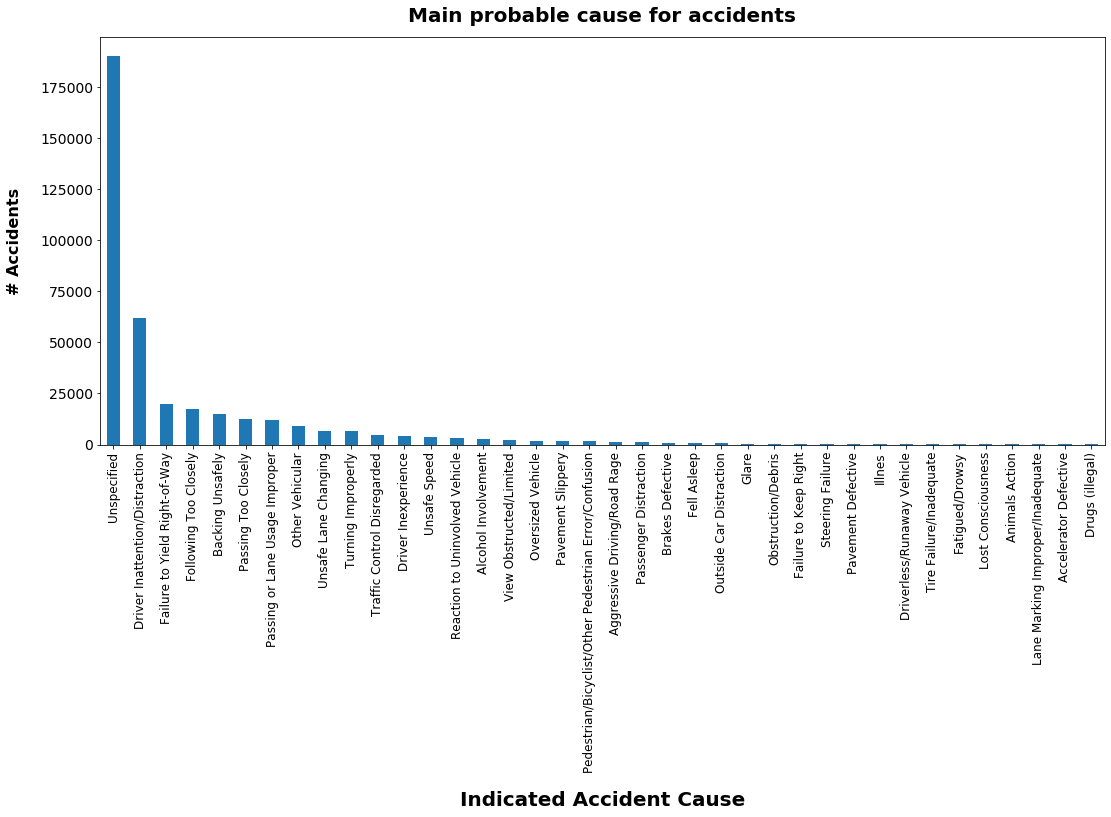

In [308]:
test_concat3.sort_values(by=['COUNT'], inplace=True, ascending=False)
print(test_concat3)

ax = test_concat3[test_concat3['COUNT']>100].plot.bar(y=['COUNT'], legend=False, figsize = (18, 7.5))
ax.set_xlabel("Indicated Accident Cause", labelpad=18, fontsize=20, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Main probable cause for accidents', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =12)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

**Answer**. We can see that the most common cause is reported to be "unspecified", and it is not a negligible number. In fact, it is more than 3 times the second most common cause of accidents. This is definitely an indicator that a better follow up on the cause of the accident must be done to classify those 190k accidents correctly and the ones to happen in the future.

After unspecified, we have "Driver Inattention/Distraction", "Failure to Yield Right-of-Way", "Following Too Closely", "Bracking Unsafely" and "Passing Too Closely". 

It is also noticeable that in many cases, the accidents report an "unspecified cause" plus another main cause which was correctly identified.

### Exercise 10 (55 min):

Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. 

**Hint:** You can apply a similar approach to the one used in the previous question.

In [310]:
vh_test = df[['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3',
                'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

vh_test_concat = pd.DataFrame(pd.concat([vh_test['VEHICLE TYPE CODE 1'],vh_test['VEHICLE TYPE CODE 2'],
                              vh_test['VEHICLE TYPE CODE 3'], vh_test['VEHICLE TYPE CODE 4'], vh_test['VEHICLE TYPE CODE 5']]))
vh_test_concat.reset_index(inplace=True)
print(vh_test_concat)

vh_test_concat.dropna(inplace=True)

vh_test_concat.rename(columns={0: "VEHICLE_TYPE"},inplace=True)

vh_test_concat.loc[vh_test_concat.VEHICLE_TYPE == "SPORT UTILITY / STATION WAGON", "VEHICLE_TYPE"] = "Station Wagon/Sport Utility Vehicle"
vh_test_concat['VEHICLE_TYPE'] = vh_test_concat['VEHICLE_TYPE'].str.lower()
vh_test_concat['VEHICLE_TYPE'] = vh_test_concat['VEHICLE_TYPE'].apply(lambda x: "ambulance" if x in "ambulance" else x)
vh_test_concat['VEHICLE_TYPE'] = vh_test_concat['VEHICLE_TYPE'].apply(lambda x: "sedan" if x in "sedan" else x)
vh_test_concat['VEHICLE_TYPE'] = vh_test_concat['VEHICLE_TYPE'].apply(lambda x: "bike" if x in "bicycle" else x)
vh_test_concat['VEHICLE_TYPE'] = vh_test_concat['VEHICLE_TYPE'].apply(lambda x: "sedan" if "sedan" in x else x)

vh_grouped=vh_test_concat.groupby(['index',"VEHICLE_TYPE"])

          index                                    0
0          3165                                 Taxi
1          3081                                Sedan
2         15404  Station Wagon/Sport Utility Vehicle
3          5104                                Sedan
4          5112                                Sedan
...         ...                                  ...
1192605  230599                                  NaN
1192606  229587                                  NaN
1192607  238107                                  NaN
1192608  233571                                  NaN
1192609  234500                                  NaN

[1192610 rows x 2 columns]


In [311]:
vh_test_concat[vh_test_concat['index']==2500]

,index,VEHICLE_TYPE
13329,2500,sedan
251851,2500,sedan
490373,2500,sedan


In [312]:
vh_test_concat2 = vh_test_concat.groupby(['index',"VEHICLE_TYPE"]).first()

In [316]:
vh_test_concat2.dropna(inplace=True)
vh_test_concat2= vh_test_concat2.reset_index()

In [317]:
vh_test_concat2.rename(columns={'index':"CRASH_INDEX"},inplace=True)
vh_test_concat2

,CRASH_INDEX,VEHICLE_TYPE
0,0,sedan
1,1,sedan
2,2,sedan
3,3,bike
4,3,station wagon/sport utility vehicle
...,...,...
354055,238519,passenger vehicle
354056,238519,station wagon/sport utility vehicle
354057,238520,passenger vehicle
354058,238520,station wagon/sport utility vehicle


In [320]:
vh_test_concat3 = pd.DataFrame(vh_test_concat2.groupby(['VEHICLE_TYPE']).agg('count'))
vh_test_concat3.rename(columns={'CRASH_INDEX':"COUNT"},inplace=True)

                                      COUNT
VEHICLE_TYPE                               
station wagon/sport utility vehicle  124205
sedan                                119716
passenger vehicle                     31228
taxi                                  19082
pick-up truck                         13638
box truck                              8509
bike                                   7271
bus                                    5870
ambulance                              2981
van                                    2730
tractor truck diesel                   2317
motorcycle                             2124
tk                                     2051
dump                                   1140
convertible                             987
pk                                      712
garbage or refuse                       693
flat bed                                684
vn                                      594
ds                                      554


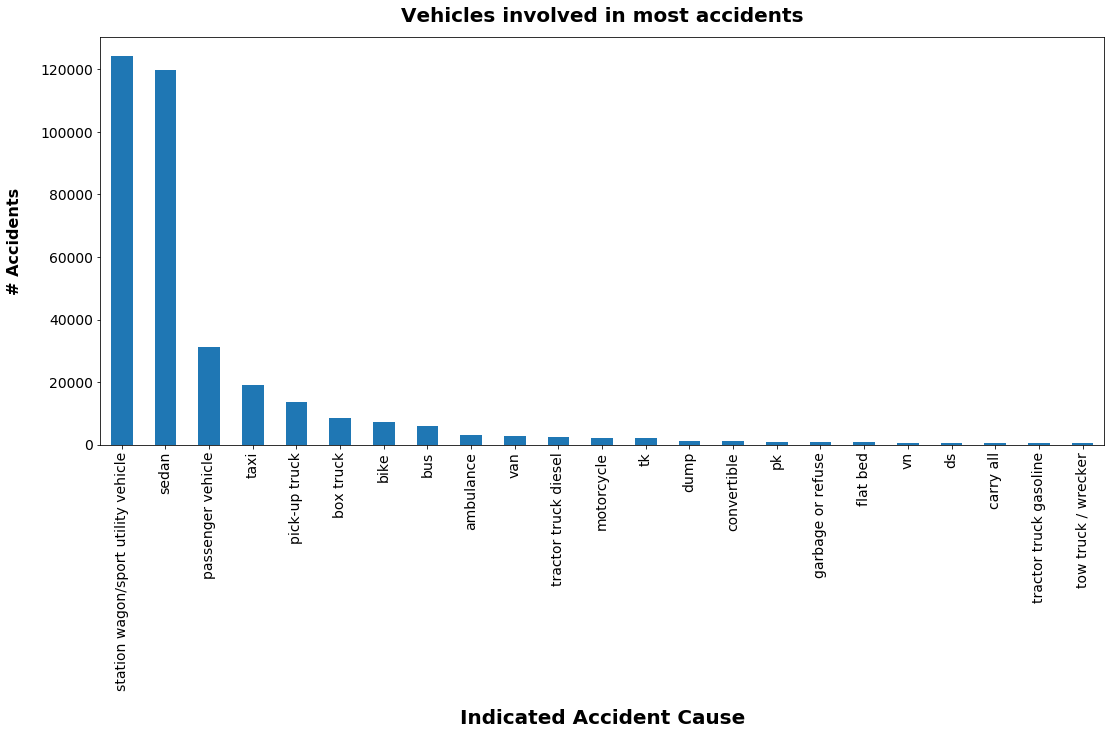

In [321]:
vh_test_concat3.sort_values(by=['COUNT'], inplace=True, ascending=False)
print(vh_test_concat3.head(20))

ax = vh_test_concat3[vh_test_concat3['COUNT']>300].plot.bar(y=['COUNT'], legend=False, figsize = (18, 7.5))
ax.set_xlabel("Indicated Accident Cause", labelpad=18, fontsize=20, fontweight='bold')
ax.set_ylabel("# Accidents", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Vehicles involved in most accidents', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

In [322]:
# vh_test_concat3.iloc[50:100]
# vh_test_concat3.loc['SPORT UTILITY / STATION WAGON']
vh_test_concat3.sort_index().iloc[0:50]
print(vh_test_concat3.shape)
print(vh_test_concat3[vh_test_concat3['COUNT']<100])
print(vh_test_concat3[vh_test_concat3['COUNT']<10])
vh_test_concat3[vh_test_concat3['COUNT']==1]

(449, 1)
              COUNT
VEHICLE_TYPE       
fdny             95
3-door           78
tt               74
e-bik            71
tn               69
...             ...
jcb40             1
icecr             1
hwy c             1
hrse              1
ã¯â¿â½mbu         1

[407 rows x 1 columns]
              COUNT
VEHICLE_TYPE       
sprin             9
freig             9
food              9
trac              9
e bik             9
...             ...
jcb40             1
icecr             1
hwy c             1
hrse              1
ã¯â¿â½mbu         1

[343 rows x 1 columns]


,COUNT
VEHICLE_TYPE,
utll,1
red t,1
van c,1
ukn,1
uhual,1
...,...
jcb40,1
icecr,1
hwy c,1


**Answer.** 
In the plot shown above, we can see that the main vehicles involved in accidents are the following (accompanied by the amount of accidents):

**VEHICLE_TYPE**                              

station wagon/sport utility vehicle  124205

sedan                                119718

passenger vehicle                     31228

taxi                                  19082

pick-up truck                         13638

box truck                              8509

bike                                   7271

bus                                    5870

ambulance                              2993

van 2731

Moreover, we can see that there are 208 out of 449 vehicle types that appear only once and seem to have wrong typing. I consider we should not dispose of them in this case, given the total amount of crashes is also important.
Also, 135 out of 449 vehicle types appear more than once and up to 10 times. And 64 out of 449 appear more than 10 times and up to 100 times. We can quickly see that the description is confusing and this probably requires a deeper processing of the data as was done with the types that were described as "bi", "bic", "bicycle" that were grouped together with "bike".

### Exercise 11 (15 min):

In a 2018 [interview](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) with The New York Times, New York's mayor de Blasio stated that *'Vision Zero is clearly working'*. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio-1-30707464/), the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.

How would you use the provided data to understand what went wrong in the first quarter of 2019?

> - [ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. 

> - [ ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    

> - [ ] The provided data is insufficient to improve our understanding of the situation.

> - [x] None of the above. I would do the following: *Create a pair of heatmaps of the accidents involving injured/killed pedestrians, cyclists and people in vehicles in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents, the predominant hours for the accidents and check how the "Vision Zero" initiatives are being applied in those places. Give a recommendation to visit these areas to study the problem further. It would be important to check if the places have simmilarities with places which problems have been already addressed via "Vision Zero".*

### Exercise 12 (45 min):

Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?

**For example,** if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.

**Hint:** You may want to create a new column with the total number of kills in the accident. For that you may find the function ```.to_numpy()``` useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. 

In [19]:
dth_df = df[['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3',
                'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

dth_df
# df['COLLISION_ID'].unique().shape[0] == df.shape[0]
dth = df[['NUMBER OF PEDESTRIANS KILLED',
              'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']]

print("Checking for NaNs in the columns that report kills\n", dth.isna().any())

dth['TOTAL_KILLS']= pd.Series(numpy.sum(dth.to_numpy(),axis=1))
dth_df['TOTAL_KILLS'] = dth['TOTAL_KILLS'];
# dth[dth["TOTAL_KILLS"]==1]
dth_df[dth_df['VEHICLE TYPE CODE 1'].isna()]

Checking for NaNs in the columns that report kills
 NUMBER OF PEDESTRIANS KILLED    False
NUMBER OF CYCLIST KILLED        False
NUMBER OF MOTORIST KILLED       False
dtype: bool


<ipython-input-19-e19c0f6846c9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dth['TOTAL_KILLS']= pd.Series(numpy.sum(dth.to_numpy(),axis=1))
<ipython-input-19-e19c0f6846c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dth_df['TOTAL_KILLS'] = dth['TOTAL_KILLS'];


,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL_KILLS
9439,NaN,NaN,NaN,NaN,NaN,0
12990,NaN,NaN,NaN,NaN,NaN,0
2035,NaN,NaN,NaN,NaN,NaN,0
3124,NaN,NaN,NaN,NaN,NaN,0
6020,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
226902,NaN,NaN,NaN,NaN,NaN,0
231858,NaN,NaN,NaN,NaN,NaN,0
228150,NaN,NaN,NaN,NaN,NaN,0
226917,NaN,NaN,NaN,NaN,NaN,0


In [20]:
d1 = dth_df[['VEHICLE TYPE CODE 1', 'TOTAL_KILLS']]
d2 = dth_df[['VEHICLE TYPE CODE 2', 'TOTAL_KILLS']]
d3 = dth_df[['VEHICLE TYPE CODE 3', 'TOTAL_KILLS']]
d4 = dth_df[['VEHICLE TYPE CODE 4', 'TOTAL_KILLS']]
d5 = dth_df[['VEHICLE TYPE CODE 5', 'TOTAL_KILLS']]

d1.rename(columns={'VEHICLE TYPE CODE 1':'VEHICLE_TYPE'},inplace=True)
d2.rename(columns={'VEHICLE TYPE CODE 2':'VEHICLE_TYPE'},inplace=True)
d3.rename(columns={'VEHICLE TYPE CODE 3':'VEHICLE_TYPE'},inplace=True)
d4.rename(columns={'VEHICLE TYPE CODE 4':'VEHICLE_TYPE'},inplace=True)
d5.rename(columns={'VEHICLE TYPE CODE 5':'VEHICLE_TYPE'},inplace=True)

dth_df2 = d1.append([d2,d3,d4,d5])
dth_df2.dropna(inplace=True)

dth_df2.loc[dth_df2.VEHICLE_TYPE == "SPORT UTILITY / STATION WAGON", "VEHICLE_TYPE"] = "Station Wagon/Sport Utility Vehicle"
dth_df2['VEHICLE_TYPE'] = dth_df2['VEHICLE_TYPE'].str.lower()
dth_df2['VEHICLE_TYPE'] = dth_df2['VEHICLE_TYPE'].apply(lambda x: "ambulance" if x in "ambulance" else x)
dth_df2['VEHICLE_TYPE'] = dth_df2['VEHICLE_TYPE'].apply(lambda x: "sedan" if x in "sedan" else x)
dth_df2['VEHICLE_TYPE'] = dth_df2['VEHICLE_TYPE'].apply(lambda x: "bike" if x in "bicycle" else x)
dth_df2['VEHICLE_TYPE'] = dth_df2['VEHICLE_TYPE'].apply(lambda x: "sedan" if "sedan" in x else x)
dth_df2.reset_index(inplace=True)

# dth_df2[(dth_df2['VEHICLE_TYPE']=='ambulance') & (dth_df2["TOTAL_KILLS"]==1)]
dth_df2

C:\Users\dcalle.MATONE\Documents\case_1.2_var2\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,VEHICLE_TYPE,TOTAL_KILLS
0,3165,taxi,0
1,3081,sedan,0
2,15404,station wagon/sport utility vehicle,0
3,5104,sedan,0
4,5112,sedan,0
...,...,...,...
435498,231681,station wagon/sport utility vehicle,0
435499,230485,sedan,0
435500,225966,passenger vehicle,0
435501,229916,passenger vehicle,0


In [27]:
dth_df2 = dth_df2.groupby(['index','VEHICLE_TYPE']).first()

# dth_df2.sort_values('index').groupby(['VEHICLE_TYPE']).first()

,index,VEHICLE_TYPE,TOTAL_KILLS
0,0,sedan,0
1,1,sedan,0
2,2,sedan,0
3,3,bike,0
4,3,station wagon/sport utility vehicle,0
...,...,...,...
354055,238519,passenger vehicle,0
354056,238519,station wagon/sport utility vehicle,0
354057,238520,passenger vehicle,0
354058,238520,station wagon/sport utility vehicle,0


In [30]:
dth_df2.reset_index(level='VEHICLE_TYPE',inplace=True)
# dth_df2.index.unique()
dth_df2.VEHICLE_TYPE.unique().shape
dth_df2[(dth_df2['VEHICLE_TYPE']=='station wagon/sport utility vehicle') & (dth_df2["TOTAL_KILLS"]==1)]

,index,VEHICLE_TYPE,TOTAL_KILLS
8317,5588,station wagon/sport utility vehicle,1
8800,5919,station wagon/sport utility vehicle,1
12819,8588,station wagon/sport utility vehicle,1
12831,8595,station wagon/sport utility vehicle,1
13062,8744,station wagon/sport utility vehicle,1
...,...,...,...
334462,225006,station wagon/sport utility vehicle,1
340037,228847,station wagon/sport utility vehicle,1
340252,228991,station wagon/sport utility vehicle,1
341575,229907,station wagon/sport utility vehicle,1


In [31]:
dth_df3 = dth_df2.groupby(['VEHICLE_TYPE']).agg('sum')
dth_df3.sort_values(by=['TOTAL_KILLS'], inplace=True, ascending=False)
# dth_df3=dth_df3.drop(columns='index')
dth_df3[(dth_df3["TOTAL_KILLS"]>0)]

,index,TOTAL_KILLS
VEHICLE_TYPE,,
station wagon/sport utility vehicle,14681267486,115
sedan,11396633667,105
passenger vehicle,6626331652,20
taxi,2375362680,17
pick-up truck,1609654427,15
box truck,803385932,11
bus,575815769,8
bike,767187478,6
motorcycle,216987366,3


**Answer.**

In [329]:
dth_df4=dth_df3.reset_index()
dth_df4=dth_df4[dth_df4.index<5]

                                     TOTAL_KILLS
VEHICLE_TYPE                                    
station wagon/sport utility vehicle          115
sedan                                        105
passenger vehicle                             20
taxi                                          17
pick-up truck                                 15


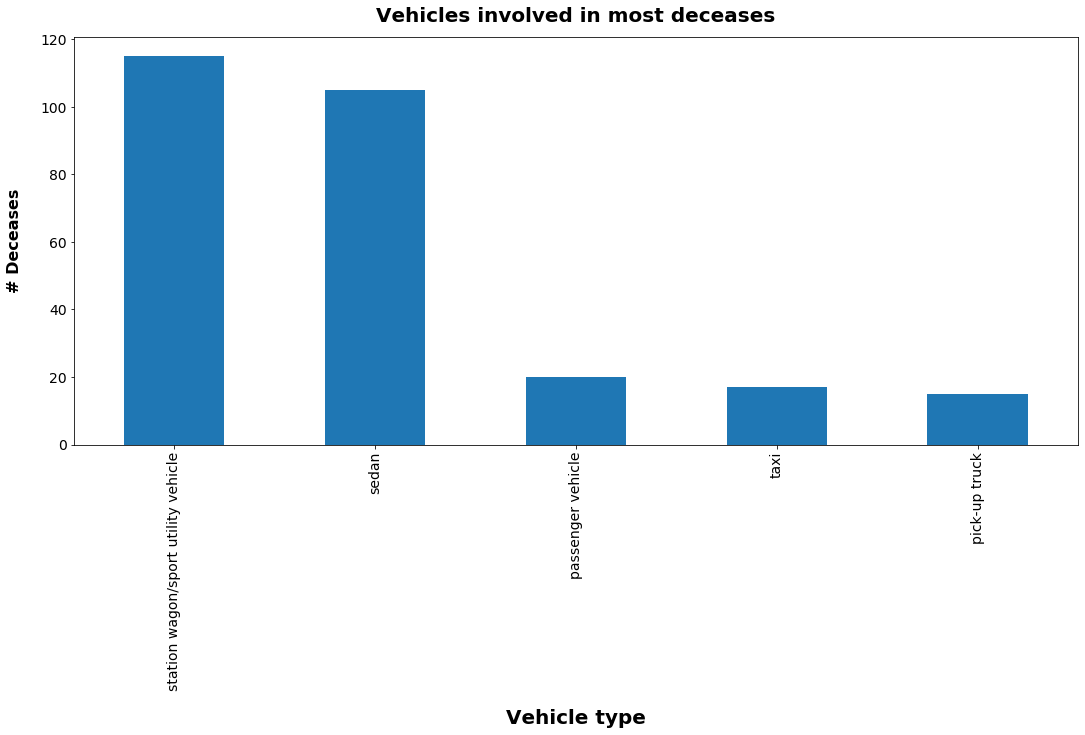

In [330]:
dth_df4=dth_df4.set_index("VEHICLE_TYPE")
print(dth_df4)
ax = dth_df4.plot.bar(y=['TOTAL_KILLS'], legend=False, figsize = (18, 7.5))
ax.set_xlabel("Vehicle type", labelpad=18, fontsize=20, fontweight='bold')
ax.set_ylabel("# Deceases", labelpad=18, fontsize=16, fontweight='bold')
ax.set_title('Vehicles involved in most deceases', fontsize=20, fontweight='bold', pad=15)
ax.tick_params(axis='x', rotation=90, labelsize =14)
ax.tick_params(axis='y', rotation=0, labelsize =14)

plt.show()

As can be seen above, the pick-up truck has the lowest amount of deceases from the top 5. Following it are the the following vehicles:

box truck	11

bus	8

bike	6

motorcycle	3

All the other types of vehicles are only involved in at most 2 deceases.